In [11]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [12]:
df = df[df['job_title_short'] == 'Data Scientist']
df.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"[r, python, sql, pandas, numpy, scikit-learn, ...","{'libraries': ['pandas', 'numpy', 'scikit-lear..."
21,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,France,2023-02-23 13:41:21,False,False,France,None,NaN,NaN,Credit Agricole,None,None


In [33]:
for i, skill in enumerate(skill_counts.index):
    print(skill, skill_counts['skill_count'].iloc[i], 
          skill_counts['median_salary'].iloc[i], 
          )


python 113711 130500.0
sql 78982 132500.0
r 59566 125000.0
sas 29534 119000.0
tableau 29445 125000.0
aws 26256 132500.0
spark 24286 135000.0
azure 21664 127500.0
tensorflow 19153 140000.0
excel 17545 117500.0


In [19]:
df_exploded = df.explode('job_skills')
df_exploded
skill_counts = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
).sort_values(by='skill_count', ascending=False).head(10)
skill_counts

,skill_count,median_salary
job_skills,,
python,113711,130500.0
sql,78982,132500.0
r,59566,125000.0
sas,29534,119000.0
tableau,29445,125000.0
aws,26256,132500.0
spark,24286,135000.0
azure,21664,127500.0
tensorflow,19153,140000.0


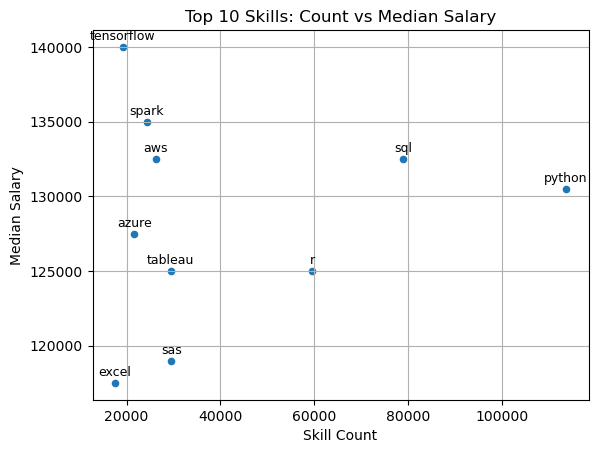

In [37]:
skill_counts.plot(kind='scatter', x='skill_count', y='median_salary', title='Top 10 Skills: Count vs Median Salary')
plt.xlabel('Skill Count')   
plt.ylabel('Median Salary')
plt.grid(True)

for i, skill in enumerate(skill_counts.index):
    plt.annotate(skill, (skill_counts['skill_count'].iloc[i], 
          skill_counts['median_salary'].iloc[i]),
          textcoords="offset points", xytext=(0,5), ha='center', fontsize=9
          )


plt.show()